In [1]:
import glob
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as mtick

from os import listdir

In [ ]:
# My local paths TODO Can git lfs resolve this?
### Laptop path ###
filepath_above_breakdown = 'csv/10mswindow_25MHzSR_1kpts_10mVperdiv_ch4_44.135VBias/'
filenames_above_breakdown = glob.glob(filepath_above_breakdown+'*.csv')
#filenames_above_breakdown = ['csv/June82022_simlabtests/wvfm_25MHzSR_44.134VBias_10msPerDiv_2.5Mpts_000_ALL.csv']
### CSU Machine path ###
#filepath_above_breakdown = '../csv/long_traces/10mswindow_25MHzSR_1kpts_10mVperdiv_ch4_44.135VBias/'
#filenames_above_breakdown = glob.glob(filepath_above_breakdown+'*.csv')

candidate_count_abd = 0
window_size = 1e-6    # Desired window size of 1 mus
# TODO Automatically get this from csv header
sample_interval = 4e-8
steps_in_window = int(window_size / sample_interval)
time_buffer = math.ceil(steps_in_window / 2)
candidate_integral_threshold = 2 # nV*s
candidate_voltage_threshold = 0.002 # 2 mV
integrals = []
candidate_integrals = []
candidate_voltages  = 0
# Loop files 
for file_abd in filenames_above_breakdown:
    print('Looping file', file_abd)
    trace = np.loadtxt(file_abd,delimiter=',', skiprows=12)
    time    = trace[:,0]
    voltage = trace[:,1] 
    # TODO Alternate count: all points above voltage threshold
    
    start_index = 0
    while start_index < (len(time) - steps_in_window):
        window_voltage = voltage[start_index:(start_index+steps_in_window)]*1e9 # Convert to nV for integral (want nV*s)
        window_time    = time[start_index:(start_index+steps_in_window)]
        window_integral = np.trapz(window_voltage, x=window_time)
        if not math.isinf(window_integral):
            integrals.append(window_integral)
        #else:
            #print('Inf found in range', start_index, 'to', start_index+steps_in_window)
        if window_integral > candidate_integral_threshold:
            candidate_count_abd += 1
            candidate_integrals.append(window_integral)
            # If candidate is found, shift the window forward to avoid multi-counting
            start_index += time_buffer
        else:
            start_index += 1
            
    print('Canddiate count after this file:', candidate_count_abd)
            
print('Found', candidate_count_abd, 'candidates above breakdown')

Looping file csv/10mswindow_25MHzSR_1kpts_10mVperdiv_ch4_44.135VBias/trace_ch4_20220607144903556.csv


/home/amogan/anaconda3/envs/dune_fd_pds/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/amogan/anaconda3/envs/dune_fd_pds/lib/python3.9/site-packages/numpy/core/_methods.py:48: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Got pedestal nan


In [15]:
filepath_below_breakdown = 'csv/10mswindow_25MHzSR_1kpts_10mVperdiv_ch4_10.935VBias/'
filenames_below_breakdown = glob.glob(filepath_below_breakdown+'*.csv')

candidate_count_bbd = 0
window_size = 1e-6    # Desired window size of 1 mus
# TODO Automatically get this from csv header
sample_interval = 4e-8
steps_in_window = int(window_size / sample_interval)
time_buffer = math.ceil(steps_in_window)
candidate_integral_threshold = 2 # nV*s
# Loop files 
for file_bbd in filenames_below_breakdown:
    print('Looping file', file_bbd)
    trace = np.loadtxt(file_bbd,delimiter=',', skiprows=10)
    time    = trace[:,0]
    voltage = trace[:,1]
    start_index = 0
        while start_index < (len(time) - steps_in_window):
        window_voltage = voltage[start_index:(start_index+steps_in_window)]*1e9 # Convert to nV for integral (want nV*s)
        window_time    = time[start_index:(start_index+steps_in_window)]
        window_integral = np.trapz(window_voltage, x=window_time)
        if window_integral > candidate_integral_threshold:
            candidate_count_bbd += 1
            # If candidate is found, shift the window forward to avoid multi-counting
            start_index += time_buffer
        else:
            start_index += 1
            
    print('Canddiate count after this file:', candidate_count_bbd)
            
print('Found', candidate_count_bbd, 'candidates below breakdown')

Looping file csv/10mswindow_25MHzSR_1kpts_10mVperdiv_ch4_10.935VBias/trace_ch4_20220607150251882.csv
Canddiate count after this file: 5085
Looping file csv/10mswindow_25MHzSR_1kpts_10mVperdiv_ch4_10.935VBias/trace_ch4_20220607150321808.csv
Canddiate count after this file: 5090
Looping file csv/10mswindow_25MHzSR_1kpts_10mVperdiv_ch4_10.935VBias/trace_ch4_20220607150524078.csv
Canddiate count after this file: 5090
Looping file csv/10mswindow_25MHzSR_1kpts_10mVperdiv_ch4_10.935VBias/trace_ch4_20220607150151022.csv
Canddiate count after this file: 11707
Looping file csv/10mswindow_25MHzSR_1kpts_10mVperdiv_ch4_10.935VBias/trace_ch4_20220607150221105.csv
Canddiate count after this file: 11742
Looping file csv/10mswindow_25MHzSR_1kpts_10mVperdiv_ch4_10.935VBias/trace_ch4_20220607150423632.csv
Canddiate count after this file: 11902
Looping file csv/10mswindow_25MHzSR_1kpts_10mVperdiv_ch4_10.935VBias/trace_ch4_20220607150051062.csv
Canddiate count after this file: 12881
Looping file csv/10mswi

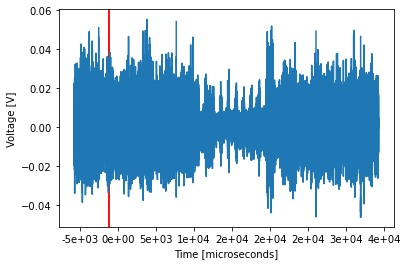

In [17]:
### Test ranges ###
# 80500:80700, window 80583 to 80608
# 115600:115650, window 115605 to 115630
# 335450:335550, window 335470 to 335495
test_file = 'csv/10mswindow_25MHzSR_1kpts_10mVperdiv_ch4_44.135VBias/trace_ch4_20220607144435713.csv'
#filenames_above_breakdown = glob.glob(filepath_above_breakdown+'*.csv')
test_trace = np.loadtxt(test_file ,delimiter=',', skiprows=10)
test_time = test_trace[:,0]*1e6
test_voltage = test_trace[:,1]
left_index = 115600
right_index = 115650
left_window_index = 115700
right_window_index = 115800
plt.axvline(test_time[left_window_index], color='r')
plt.axvline(test_time[right_window_index], color='r')
#plt.plot(test_time[left_index:right_index], test_voltage[left_index:right_index])
plt.plot(test_time, test_voltage)
plt.xlabel('Time [microseconds]')
plt.ylabel('Voltage [V]')
plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('%1.0e')) 

Left window edge: -5.710885e-06
Right window edge: -4.710885e-06
Window length in microseconds: 9.999999999999997e-07


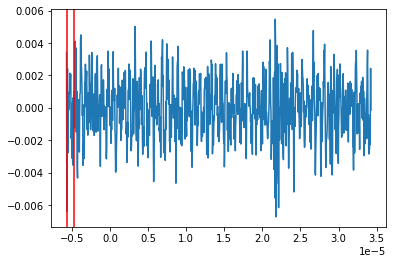

In [17]:
# Plot integration window for sanity check
# TODO Calculate steps_in_window rather than hard code
#steps_in_window = 250
print('Left window edge:', time[0])
print('Right window edge:', time[steps_in_window])
print('Window length in microseconds:', time[steps_in_window] - time[0])
plt.plot(time, voltage)
plt.axvline(time[0], color='r')
plt.axvline(time[steps_in_window], color='r')